# GMM (Gaussian Mixture Model)
-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
font = fm.FontProperties(fname=font_path).get_name() # 한글 폰트 이름 가져오기
matplotlib.rc('font', family=font) # 한글 폰트 사용 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 사용 설정

In [ ]:
# 가우시안 기반으로 타원형으로 군집화된다. 우리가 1차원에서는 보통 '정규분포'를 따라서 종모양으로 데이터들이 분산되어있는데,
# 2차원에서는 타원형으로 군집화된다. → 가우신안 군집화화

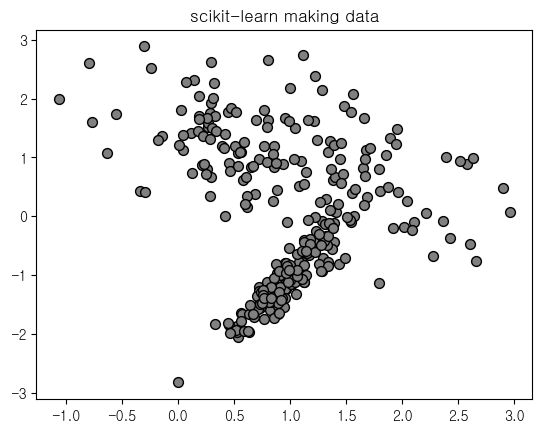

In [ ]:
# 데이터 생성
from sklearn.datasets import make_classification # 분류에 최적화된 데이터 생성

X, _ = make_classification(
    n_samples=300,            # 샘플(데이터) 개개수
    n_features=2,             # 특성 수
    n_informative=2,          # 유의미한 특성 개수
    n_redundant=0,            # 중복 특성 개수
    n_clusters_per_class=1,   # class 당 클러스터 수
    n_classes=2,              # 클래스(레이블) 수
    random_state=42           # 데이터 생성 시 랜덤 시드 설정
)


plt.scatter(X[:, 0], X[:, 1], s=50, c='gray', marker='o', edgecolors='k')
plt.title('scikit-learn making data')
plt.show()

In [ ]:
# 가우시안 분포를 따른 다는 것은 각 지표에 얼마나 분산되어있는지 '확률'의 지표로 나타낸다.
# 군집에 속할 확률로 Cluster를 하기 때문에 '유연한' Cluster를 할 수 있다.

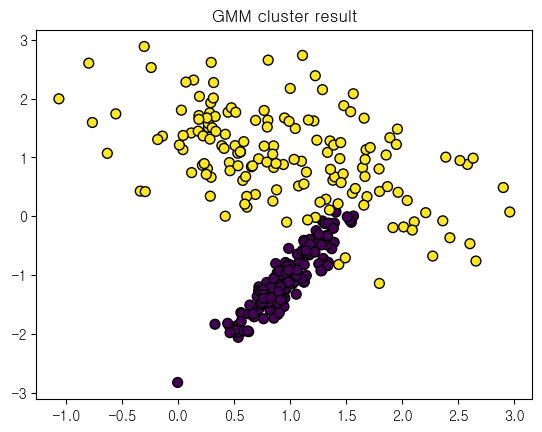

In [ ]:
# GMM 적용 및 군집화 결과 시각화
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=42) # → Cluster를 할 것이기 때문에 n_components를 2로 설정
gmm.fit(X) # 각각의 Cluster가 어떻게 분산되어있는지, 분포를 확인하는 과정, 데이터의 특성을 보고서 학습을 한다.

labels = gmm.predict(X) # 학습을 한 데이터를 통해서 레이블을 예측한다.

# 예측하나 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, marker='o', edgecolors='k') # cmap='viridis' 컬러맵 설정
plt.title('GMM cluster result')
plt.show()

In [ ]:
probs = gmm.predict_proba(X) # 예측하는 확률 지표 -> 2개의 cluster에 속할 확률
probs

array([[9.99857099e-001, 1.42901017e-004],
       [3.62260088e-026, 1.00000000e+000],
       [9.99995019e-001, 4.98134626e-006],
       [7.32390701e-001, 2.67609299e-001],
       [1.74569511e-026, 1.00000000e+000],
       [9.99936958e-001, 6.30416035e-005],
       [9.21418258e-021, 1.00000000e+000],
       [7.94799876e-018, 1.00000000e+000],
       [4.93919163e-021, 1.00000000e+000],
       [9.70017834e-001, 2.99821657e-002],
       [9.54923911e-001, 4.50760886e-002],
       [9.99879304e-001, 1.20696123e-004],
       [3.27130414e-064, 1.00000000e+000],
       [1.39326192e-021, 1.00000000e+000],
       [1.33647410e-043, 1.00000000e+000],
       [9.26089744e-001, 7.39102565e-002],
       [4.32816217e-002, 9.56718378e-001],
       [9.99678034e-001, 3.21965700e-004],
       [9.99949568e-001, 5.04316830e-005],
       [9.57954083e-001, 4.20459172e-002],
       [1.58459678e-043, 1.00000000e+000],
       [9.99926814e-001, 7.31863109e-005],
       [9.99961091e-001, 3.89089800e-005],
       [8.4

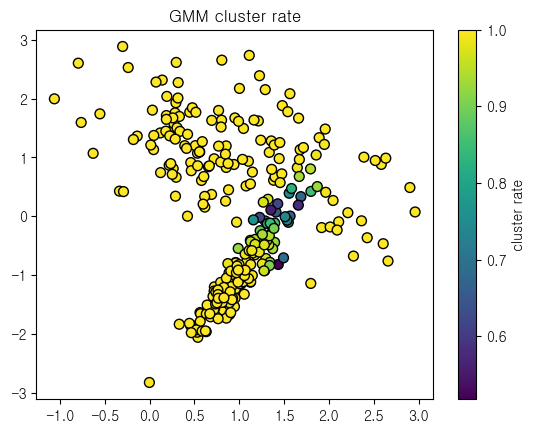

In [17]:
# 군집 포함 확률 시각화 -> 어느 군집에 포함이 될지를 '확률'로 뽑아서 시각화
probs = gmm.predict_proba(X) # 예측하는 확률 지표

# 예측하나 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=probs.max(axis=1), s=50, marker='o', edgecolors='k')
plt.title('GMM cluster rate')
plt.colorbar(label='cluster rate')
plt.show()